## 1. Introduction to Python Basics
____
*	Topics Covered:
    *	Data types
    *   Indexing and slicing
    *   Loading data CSV, Excel files
    *   Working with data
    *   Basic plotting

In [5]:
# Install the required packages for the project

# ! pip install pandas
# ! pip install numpy
# ! pip install matplotlib

In [6]:
# Print a simple message to demonstrate Python syntax
print("Welcome to Python!")

Welcome to Python!


## 2. Basic Data Types in Python

___

*	Topics Covered:
    *	Strings (str)
    *	Integers (int)
    *	Lists (list)


In [7]:
# Examples of data types
name = "Alice"  # String
age = 30        # Integer
height = 5.6    # Float
items = ["apple", "banana", "cherry"]  # List

print("Name:", name)
print("Age:", age)
print("Height:", height)
print("Shopping List:", items)

Name: Alice
Age: 30
Height: 5.6
Shopping List: ['apple', 'banana', 'cherry']


In [8]:
# Arithmetic operations
a = 10
b = 3
print('Sum:', a + b)
print('Difference:', a - b)
print('Product:', a * b)
print('Division:', a / b)
print('Floor Division:', a // b)
print('Modulus:', a % b)
print('Exponentiation:', a ** b)

Sum: 13
Difference: 7
Product: 30
Division: 3.3333333333333335
Floor Division: 3
Modulus: 1
Exponentiation: 1000


In [9]:
# String operations
first_name = "John"
last_name = "Doe"
full_name = first_name + " " + last_name
print('Full Name:', full_name)
print('Uppercase:', full_name.upper())
print('Lowercase:', full_name.lower())
print('Split Name:', full_name.split())

Full Name: John Doe
Uppercase: JOHN DOE
Lowercase: john doe
Split Name: ['John', 'Doe']


In [10]:
# List operations
numbers = [1, 2, 3, 4, 5, 6]
print('Original List:', numbers)
numbers.append(7)
print('List after Append:', numbers)
print('Second Element:', numbers[1])
print('Last Element:', numbers[-1])
numbers.sort(reverse=True)
print('List after Sorting:', numbers)

Original List: [1, 2, 3, 4, 5, 6]
List after Append: [1, 2, 3, 4, 5, 6, 7]
Second Element: 2
Last Element: 7
List after Sorting: [7, 6, 5, 4, 3, 2, 1]


In [11]:
# indexing and slicing
print('First 3 elements:', numbers[:3])
print('Last 3 elements:', numbers[-3:])
print('Elements from 2 to 4:', numbers[1:4])


First 3 elements: [7, 6, 5]
Last 3 elements: [3, 2, 1]
Elements from 2 to 4: [6, 5, 4]


## In this section we will start using external libraries. 

____

## 3. Loading and Exploring Data

____

*	Topics Covered:
    *	Reading a CSV file
    *	Exploring basic data statistics

In [12]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

number_of_values = 200

# Generate data
data = {
    "Control": np.random.normal(loc=30, scale=10, size=number_of_values),
    "Treatment": np.random.normal(loc=60, scale=10, size=number_of_values)
}

# Create DataFrame
df = pd.DataFrame(data)


print(df.head(10))  # Display the first 10 rows to check the data

     Control  Treatment
0  34.967142  63.577874
1  28.617357  65.607845
2  36.476885  70.830512
3  45.230299  70.538021
4  27.658466  46.223306
5  27.658630  50.621750
6  45.792128  65.150353
7  37.674347  65.137860
8  25.305256  65.150477
9  35.425600  98.527315


### To load a dataset from a CSV or Excel file
_____
```sh
import pandas as pd
```

#### CSV file
```sh
csv_file = 'path_to_file.xlsx'
```
```sh
data = pd.read_csv(csv_file)
```

----

#### Excel file
```sh
excel_file = 'path_to_file.xlsx'
```
```sh
data = pd.read_excel(excel_file)
```
-----

In [13]:
# Calculate summary statistics
summary_stats = df[['Control', 'Treatment']].agg(['mean', 'std'])
print(summary_stats)

        Control  Treatment
mean  29.592290  60.858682
std    9.310039   9.870038


In [14]:
#df.agg?

## 4. Data Indexing and Selection

____

*	Topics Covered:
    *	Selecting rows and columns
    *	Conditional selection


In [15]:
# Selecting a column in the dataframe
df['Control'][0:5]

0    34.967142
1    28.617357
2    36.476885
3    45.230299
4    27.658466
Name: Control, dtype: float64

In [16]:
# Selecting rows in the dataframe
df.loc[5:10]

,Control,Treatment
5,27.658630,50.621750
6,45.792128,65.150353
7,37.674347,65.137860
8,25.305256,65.150477
9,35.425600,98.527315
10,25.365823,65.708905


In [17]:
# Adding columns to the dataframe

#  Calculate the difference
df['Difference'] = df['Treatment'] - df['Control']

# Significance effects is assumed to be larger than a threshold of 15
threshold = 30

# Add a boolean column indicating Signinficant treatment effect
df['Significant'] = df['Difference'] > threshold

# Display rows with significant treatment effect
df.head(10)


,Control,Treatment,Difference,Significant
0,34.967142,63.577874,28.610732,False
1,28.617357,65.607845,36.990488,True
2,36.476885,70.830512,34.353627,True
3,45.230299,70.538021,25.307722,False
4,27.658466,46.223306,18.564840,False
5,27.658630,50.621750,22.963119,False
6,45.792128,65.150353,19.358225,False
7,37.674347,65.137860,27.463512,False
8,25.305256,65.150477,39.845221,True
9,35.425600,98.527315,63.101714,True


## 5. Data Visualization

____
*	Topics Covered:
    *	Creating a linear plot
    *	Generating a box plot
    *	Making a scatter plot


In [19]:
import matplotlib.pyplot as plt


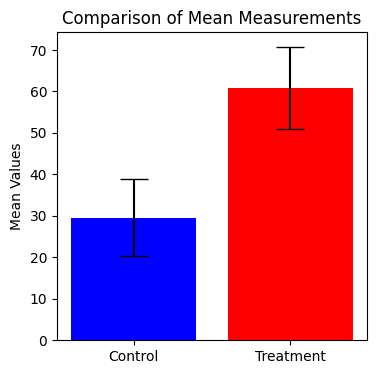

In [20]:
# Combined Bar Plot for Mean Values
plt.figure(figsize=(4, 4))
labels = ['Control', 'Treatment']
means = [summary_stats.loc['mean', 'Control'], summary_stats.loc['mean', 'Treatment']]
errors = [summary_stats.loc['std', 'Control'], summary_stats.loc['std', 'Treatment']]

plt.bar(labels, means, yerr=errors, capsize=10, color=['blue', 'red'])
plt.title('Comparison of Mean Measurements')
plt.ylabel('Mean Values')
plt.show()

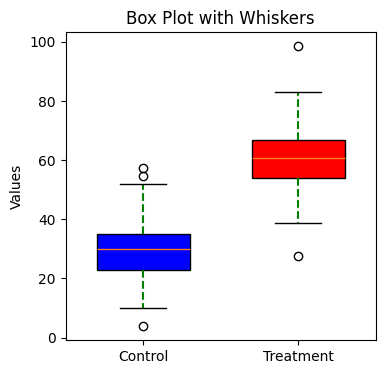

In [21]:
# Create a box plot
plt.figure(figsize=(4, 4))
# Positions for the groups
positions = [1, 2]

# Creating the box plot with 'patch_artist=True' to enable face coloring
box = plt.boxplot([df['Control'], df['Treatment']], tick_labels=['Control', 'Treatment'], 
                  positions=positions, patch_artist=True, widths=0.6, whiskerprops={'linewidth':1.5, 'linestyle': '--', 'color':'green'})

# Coloring the boxes
colors = ['blue', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


plt.title('Box Plot with Whiskers')
plt.ylabel('Values')
plt.show()

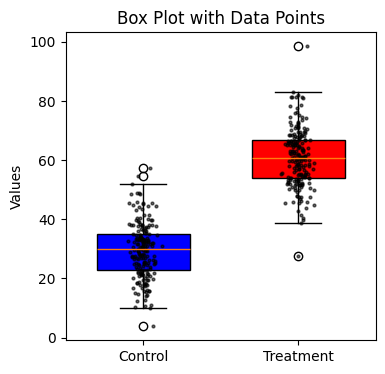

In [22]:
# Create a box plot
plt.figure(figsize=(4, 4))
# Positions for the groups
positions = [1, 2]

# Creating the box plot with 'patch_artist=True' to enable face coloring
box = plt.boxplot([df['Control'], df['Treatment']], tick_labels=['Control', 'Treatment'], 
                  positions=positions, patch_artist=True, widths=0.6)

# Coloring the boxes
colors = ['blue', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding data points on top of the box plots
for i, data in enumerate([df['Control'], df['Treatment']], start=1):
    x = np.random.normal(i, 0.04, size=len(data))  # Add some jitter to the x-values to spread the points
    plt.plot(x, data, 'o', markersize=2, alpha=0.6, color='k')  # 'k' stands for black

plt.title('Box Plot with Data Points')
plt.ylabel('Values')
plt.show()

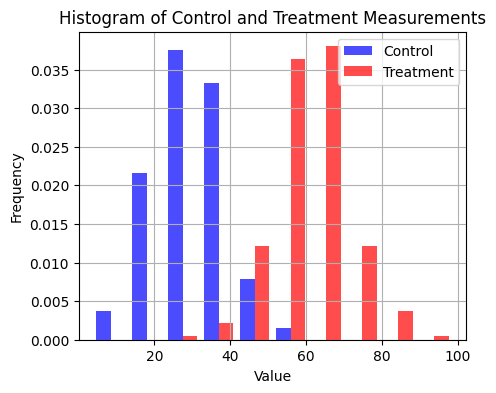

In [23]:
plt.figure(figsize=(5, 4))
plt.hist([df['Control'], df['Treatment']], bins=10, alpha=0.7, label=['Control', 'Treatment'], color=['blue', 'red'],density=True )
plt.title('Histogram of Control and Treatment Measurements')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#plt.hist?

# 5. Conditionals

___

*	Topics Covered:
    *	If statements
    *	Classes

In [45]:
from IPython.display import HTML
url = 'https://www.boardinfinity.com/blog/content/images/2022/12/Your-paragraph-text--77--1.jpg'
HTML(f'<img src="{url}" alt="Image Description" width="500" height="300">')

In [ ]:
condition = True
if condition:
    # code to execute if condition is true
    print ("Condition is True")
    

In [32]:
first_condition = False
second_condition = True

if first_condition:
    # code to execute if first_condition is true
    print("First condition is true")
elif second_condition:
    # code to execute if second_condition is true
    print("Second condition is true")
else:
    # code to execute if none of the above conditions are true
    print("Neither condition is true")
    

Second condition is true


In [ ]:
first_condition = True
nested_condition = True

if first_condition:
    if nested_condition:
        # code to execute if both first_condition and nested_condition are true
        print("Both conditions are true")

# 6. Loops
____
*	Topics Covered:
    *	For loop
        * Nested for loop
    *	While loop

In [46]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/Loop1.png'
HTML(f'<img src="{url}" alt="Image Description" width="500" height="300">')

In [27]:
# Example of a for loop that prints numbers from 0 to 9
for i in range(10):
    print(i)


0
1
2
3
4
5
6
7
8
9


In [43]:
# example of a nested for loop 
for i in range(3):
    for j in range(2):
        print(i, j)

0 0
0 1
1 0
1 1
2 0
2 1


In [44]:
# Example of a for loop that iterates over a list
fruits = ["apple", "banana", "cherry"]
for fruit in fruits:
    print(fruit)

apple
banana
cherry


In [28]:
# Example of a while loop that prints numbers from 0 to 9
i = 0
while i < 10:
    print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9


In [38]:
# Comparisons and Identity
x = 10
y = 20
if x < y:
    # code to execute if x is less than y
    print("x is less than y")



x is less than y


# 7. Reusable code

___

*	Topics Covered:
    *	Functions
    *	Classes

**Functions** in Python are defined using the def keyword and are used to encapsulate code into reusable blocks. This not only helps in making the code more organized but also allows for code reusability.

In [47]:
url = 'https://res.cloudinary.com/practicaldev/image/fetch/s--iCkOfD0L--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://cdn-images-1.medium.com/max/1024/1%2A709ugF12LLkYxvb839YNlg.png'
HTML(f'<img src="{url}" alt="Image Description" width="500" height="300">')

In [41]:
# Define a funtion that prints a message
def greet(name):
    print("Hello,", name)

# Call the function with a specific name
greet("Luis")


Hello, Luis


In [42]:
# Define a function that returns the sum of two numbers
def add(a, b):
    return a + b

# Call the function and store the result in a variable
result = add(10, 20)
print(result)  

30


**Classes** provide a means of bundling data and functionality together. Creating a class involves defining a class blueprint, which then can be used to create multiple objects.


In [48]:
url = 'https://miro.medium.com/v2/resize:fit:1400/1*CM0Jy_kA06FwPx0O432RxA.png'
HTML(f'<img src="{url}" alt="Image Description" width="500" height="300">')

In [56]:
url = 'https://miro.medium.com/v2/resize:fit:830/0*sxgttVKOUrT0fhGc.png'
HTML(f'<img src="{url}" alt="Image Description" width="500" height="300">')

In [59]:
# create a class for a car
class Car:
    # constructor method with default values
    def __init__(self, color, make, model, year):
        # attributes of the class
        self.color = color
        self.make = make
        self.model = model
        self.year = year

    # method to make the car drive. Actions. 
    def drive(self):
        print(f"The {self.color} {self.make} {self.model} {self.year} is moving!")


In [ ]:
# create another instance of the Car class with custom values
car1 = Car(color='red', make="Toyota", model="Corolla", year=2020)
# car attributes
print("Make:", car1.make)
print("Model:", car1.model)
print("Year:", car1.year)
# call the drive method
car1.drive()


In [58]:

# create another instance of the Car class with custom values
car2 = Car(color='blue', make="Honda", model="Civic", year=2021)
car2.drive()

The blue Honda Civic 2021 is moving


In [40]:
# A simple Python class for a Rectangle that can calculate area and perimeter
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2 * (self.width + self.height)

# Creating an instance of Rectangle
rect = Rectangle(10, 5)

# Accessing attributes and methods of the class

# Accessing attributes
print("Width of rectangle:", rect.width)
print("Height of rectangle:", rect.height)

# Accessing methods
print("Area of rectangle:", rect.area())
print("Perimeter of rectangle:", rect.perimeter())

Area of rectangle: 50
Perimeter of rectangle: 30
